**Loading the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
 
%cd gdrive/My Drive/Project
 
import cifar10
 
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()
 
class_names = cifar10.load_class_names()
images_train, cls_train, labels_train= cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()
 
x_train = images_train[0:45000]
y_train = labels_train[0:45000]
 
 
x_valid = images_train[45000:50000]
y_valid = labels_train[45000:50000]
 
x_test = images_test
y_test = labels_test

Mounted at /content/gdrive
/content/gdrive/My Drive/Project
Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


**Import Statements**

In [2]:
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dense, Flatten, Input, Activation, concatenate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Building the Model**

In [ ]:
def InceptionBlock(X, f):
  
  X1 = X
  X2 = X
  X3 = X
  X4 = X
 
  X1 = Conv2D(f, (1,1), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X1)
 
  X2 = Conv2D(f, (1,1), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X2)
  X2 = Conv2D(f, (3,3), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X2)
 
  X3 = Conv2D(f, (1,1), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X3)
  X3 = Conv2D(f, (5,5), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X3)
 
  X4 = MaxPooling2D((3,3), strides = (1,1), padding = 'same')(X4)
  X4 = Conv2D(f, (1,1), strides = (1,1), padding = 'same', activation = 'relu', kernel_initializer = glorot_uniform(seed = 0))(X4)
 
  X = concatenate([X1,X2,X3,X4])
 
  return X

In [ ]:
def InceptionNet():
  X_input = Input((32,32,3))
 
  X = Conv2D(64, (7,7), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed = 0))(X_input)
 
  X = InceptionBlock(X, 32)
  X = InceptionBlock(X, 32)
 
  X = MaxPooling2D((2,2))(X)
  X = InceptionBlock(X, 64)
  X = InceptionBlock(X, 64)
 
  X = MaxPooling2D((2,2))(X)
  X = InceptionBlock(X, 128)
  X = InceptionBlock(X, 128)
 
  X = MaxPooling2D((2,2))(X)
  X = InceptionBlock(X, 256)
  X = InceptionBlock(X, 256)
 
  X = MaxPooling2D((2,2))(X)
  X = InceptionBlock(X, 512)
  X = InceptionBlock(X, 512)
 
  X = AveragePooling2D((2,2))(X)
 
  X = Flatten()(X)
  X = Dense(10, activation = 'softmax', kernel_initializer = glorot_uniform(seed = 0))(X)
 
  model = Model(inputs = X_input, outputs = X)
 
  return model

In [ ]:
model = InceptionNet()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   2080        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   2080        conv2d[0][0]                     
_______________________________________________________________________________________

**Training the Model**

In [ ]:
model = InceptionNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
start = time.time()
model.fit(x_train, y_train, epochs = 1, batch_size = 100, validation_data = (x_valid, y_valid))
end = time.time()

450/450 [==============================] - 66s 147ms/step - loss: 1.7327 - accuracy: 0.3449 - val_loss: 1.4560 - val_accuracy: 0.4674


In [ ]:
model = InceptionNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
history = model.fit(x_train, y_train,epochs = 120, batch_size = 100, validation_data = (x_valid, y_valid))

Epoch 1/120
450/450 [==============================] - 69s 154ms/step - loss: 1.7173 - accuracy: 0.3503 - val_loss: 1.3983 - val_accuracy: 0.4872
Epoch 2/120
450/450 [==============================] - 69s 152ms/step - loss: 1.3357 - accuracy: 0.5070 - val_loss: 1.2494 - val_accuracy: 0.5400
Epoch 3/120
450/450 [==============================] - 68s 152ms/step - loss: 1.1471 - accuracy: 0.5848 - val_loss: 1.0272 - val_accuracy: 0.6284
Epoch 4/120
450/450 [==============================] - 68s 152ms/step - loss: 1.0069 - accuracy: 0.6378 - val_loss: 1.1091 - val_accuracy: 0.6032
Epoch 5/120
450/450 [==============================] - 68s 152ms/step - loss: 0.8861 - accuracy: 0.6840 - val_loss: 0.8730 - val_accuracy: 0.6880
Epoch 6/120
450/450 [==============================] - 68s 152ms/step - loss: 0.7714 - accuracy: 0.7264 - val_loss: 0.8355 - val_accuracy: 0.7048
Epoch 7/120
450/450 [==============================] - 68s 152ms/step - loss: 0.6769 - accuracy: 0.7618 - val_loss: 0.8588 -

**Saving the Model, History and Time**

In [ ]:
model.save('InceptionNet.h5')

In [ ]:
np.save('InceptionNet_history.npy', history.history)

In [ ]:
with open('InceptionNet_time.pkl', 'wb') as f:
    pickle.dump(round(end - start), f)

**Training Analysis**

In [3]:
with open('InceptionNet_time.pkl', 'rb') as f: 
    time_loaded = pickle.load(f)
print("Time taken for training (1 epoch): ", time_loaded, "seconds")

Time taken for training (1 epoch):  78 seconds


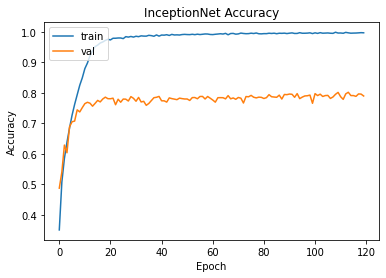

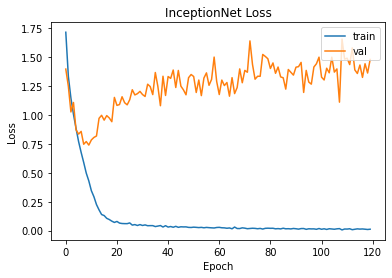

In [4]:
history_loaded = np.load('InceptionNet_history.npy', allow_pickle = 'TRUE').item()

plt.plot(history_loaded['accuracy'])
plt.plot(history_loaded['val_accuracy'])
plt.title('InceptionNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history_loaded['loss'])
plt.plot(history_loaded['val_loss'])
plt.title('InceptionNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Testing Analysis**

In [5]:
model_loaded = load_model('InceptionNet.h5')
y_pred = model_loaded.predict(x_test)

In [6]:
def convert(y):
  return [class_names[np.argmax(i)] for i in y]

y_pred_class = convert(y_pred)
y_true_class = convert(y_test)

********** Accuracy **********

 78.64 %


********** Classification Report ***********

               precision    recall  f1-score   support

    airplane       0.84      0.81      0.82      1000
  automobile       0.88      0.89      0.88      1000
        bird       0.68      0.73      0.71      1000
         cat       0.66      0.57      0.61      1000
        deer       0.71      0.80      0.75      1000
         dog       0.75      0.65      0.70      1000
        frog       0.75      0.89      0.81      1000
       horse       0.84      0.84      0.84      1000
        ship       0.91      0.84      0.87      1000
       truck       0.86      0.85      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



********** Confusion Matrix ***********




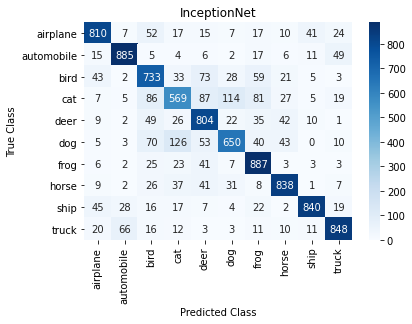

In [7]:
print("********** Accuracy **********\n\n", accuracy_score(y_true_class, y_pred_class) * 100, "%")
print("\n\n********** Classification Report ***********\n\n", classification_report(y_true_class, y_pred_class))
print("\n\n********** Confusion Matrix ***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, y_pred_class), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('InceptionNet')
plt.show()